# Sparkfun - Grove I2C Environment Sensor module
---

## Aim

* This notebook illustrates how to use available APIs for the Sparkfun Qwiic I2C Environment Sensor module along with Qwicc to grove adaptor on PYNQ-Z2 PMOD py_interfaces.


## References
* [Sparkfun Environment_Sensor](https://www.sparkfun.com/products/16466)   
* [Sparkfun qwiic to grove connector](https://www.sparkfun.com/products/15109)   
* [PYNQ Grove Adapter](https://store.digilentinc.com/pynq-grove-system-add-on-board/)   
* [Grove Base Shield V2.0](https://www.seeedstudio.com/Base-Shield-V2.html)   

## Last revised
* 31 July 2021
    + Initial version
---

### Install Driver for grove_envsensor

In [1]:
%%bash
cp -r ../../grove_envsensor /usr/local/lib/python3.6/dist-packages/pynq_peripherals/modules/

## Load _base_ Overlay

<div class="alert alert-box alert-info">
Note that we load the base bitstream only once to use Grove module with PYNQ Grove Adapter and SEEED Grove Base Shield V2.0<br>
Please make sure you run the following cell before running either of the py_interfaces 
</div>

In [2]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter, PmodGroveAdapter
base = BaseOverlay('base.bit')

## Using Sparkfun - Qwiic - Grove I2C Environment Sensor with Grove Base Shield V2.0 (Arduino)

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Insert the SEEED Grove Base Shield py_into the Arduino connector on the board. Connect Qwiic side of cable to Sparkfun Environment Sensor and the grove side to one of the connectors labeled I2C.</li></ul>
</div>

### Adapter configuration

In [6]:
adapter=ArduinoSEEEDGroveAdapter(base.ARDUINO, I2C='grove_envsensor')

### Define device object

In [3]:
envsensor = adapter.I2C

### Reading from Sparkfun Environment Sensor

In [19]:
# Initialize the sensor 
if (not envsensor.init()):
    print("Sensor configuration failed")
#read temperature
temp = envsensor.read_temperature() 
#read pressure
pres = envsensor.read_pressure() 
#read humidity
humd = envsensor.read_humidity() 
print(f"Temperature = {temp} °C, Pressure = {pres/100} hPa, Humidity = {humd} % r.H.")

Temperature = 28.459999084472656 °C, Pressure = 846.76 hPa, Humidity = 45.124000549316406 % r.H.


---
## Using Sparkfun - Qwiic - Grove I2C Environment Sensor with PYNQ Grove Adapter (PMOD)

<div class="alert alert-box alert-warning"><ul>
    <h4 class="alert-heading">Make Physical Connections </h4>
    <li>Connect the PYNQ Grove Adapter to PMODB connector.  Connect Qwiic side of cable to Sparkfun Environment Sensor and the grove side to the G3 connector of the Adapter.</li></ul>
</div>

### Adapter configuration

In [2]:
from pynq.overlays.base import BaseOverlay
from pynq_peripherals import ArduinoSEEEDGroveAdapter, PmodGroveAdapter
base = BaseOverlay('base.bit')

In [3]:
adapter=PmodGroveAdapter(base.PMODB, G3='grove_envsensor')

### Define device object

In [4]:
envsensor=adapter.G3

### Reading from Sparkfun Environment Sensor

In [5]:
# Initialize the sensor 
if (not envsensor.init()):
    print("Sensor configuration failed")
#read temperature
temp = envsensor.read_temperature() 
#read pressure
pres = envsensor.read_pressure() 
#read humidity
humd = envsensor.read_humidity() 
print(f"Temperature = {temp} °C, Pressure = {pres/100} hPa, Humidity = {humd} % r.H.")

Temperature = 28.579999923706055 °C, Pressure = 846.72 hPa, Humidity = 45.972999572753906 % r.H.


### Plot temperature on graph

[28.770000457763672, 29.079999923706055, 29.18000030517578, 29.809999465942383, 31.299999237060547, 31.899999618530273, 31.350000381469727, 30.760000228881836, 30.420000076293945, 30.25]


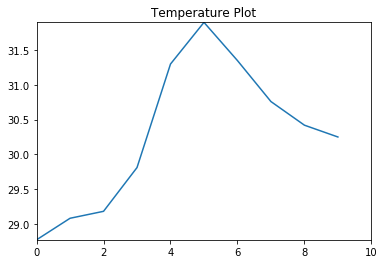

In [21]:
from time import sleep
import time
%matplotlib inline
import matplotlib.pyplot as plt
temp = []
sample = 10
while (sample):
    temp.append(envsensor.read_temperature())
    sleep(0.5)
    sample -= 1

print(temp)
plt.plot(range(len(temp)), temp)
plt.title('Temperature Plot')
min_tmp_log = min(temp)
max_tmp_log = max(temp)
plt.axis([0, len(temp), min_tmp_log, max_tmp_log])
plt.show()

Copyright (C) 2021 Xilinx, Inc 

----

----